<a href="https://colab.research.google.com/github/jonatansg/CEIABD/blob/main/Actividad_3_3_%E2%80%93_IRIS_con_NaiveBayes_y_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** Jonatan Santana González

El objetivo de esta actividad es observar las diferencias en la Predicción en los modelos de NaiveBayes al utilizar o no la Validación cruzada en el entrenamiento de los modelos.

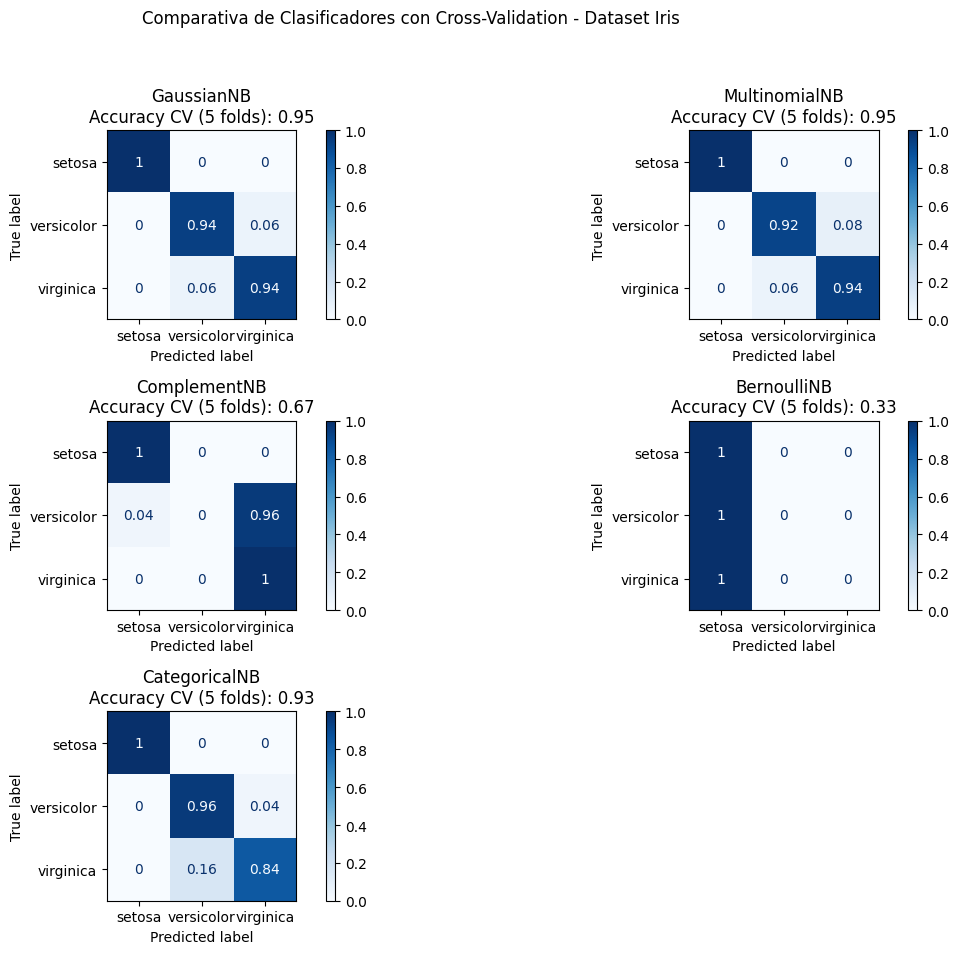

In [ ]:
# Importar librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay

# Carga de los datasets
iris = sns.load_dataset('iris')

# Clasificadores a comparar
classifiers = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Separar las características y la etiqueta
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Codificar las variables categóricas (necesario para CategoricalNB)
if X_iris.select_dtypes(include='object').shape[1] > 0:
    encoder = OrdinalEncoder()
    X_iris = pd.DataFrame(encoder.fit_transform(X_iris), columns=X_iris.columns)

# Función para evaluar clasificadores usando validación cruzada
def evaluate_classifiers_cv(X, y, dataset_name):
    plt.figure(figsize=(12, 10))
    for i, (name, model) in enumerate(classifiers.items()):
        # Asegurar que los datos no tengan valores negativos si el clasificador lo requiere
        if name in ["MultinomialNB", "ComplementNB", "BernoulliNB"]:
            X = np.abs(X)

        # Validación cruzada
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        mean_accuracy = scores.mean()

        # Entrenar y predecir una vez para la matriz de confusión
        model.fit(X, y)
        y_pred = model.predict(X)

        # Mostrar matriz de confusión
        plt.subplot(3, 2, i + 1)
        ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true', cmap='Blues', ax=plt.gca())
        plt.title(f"{name}\nAccuracy CV (5 folds): {mean_accuracy:.2f}")

    plt.suptitle(f"Comparativa de Clasificadores con Cross-Validation - Dataset {dataset_name}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Evaluar clasificadores para el dataset Iris
evaluate_classifiers_cv(X_iris, y_iris, "Iris")